Aprendizagem baseada em instâncias
Na aprendizagem baseada em instâncias, a classificação é realizada medindo as distâncias entre a nova instância a ser classificada e as instâncias da base de treinamento. Selecionando, de acordo com o K especificado, as variáveis mais próximas da instância a ser classificada e classificando de acordo com a classes das instâncias próximas. Essa aprendizagem não gera modelos de algoritmo, ela armazena os dados de treinamento para serem utilizados na classificação de novas instâncias.

Base credit data

In [ ]:
#abrindo a base de dados credit data, temos
import pickle
with open('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
#Observando as variáveis que foram criadas, temos:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_treinamento

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 0.21738243, -0.14704404,  1.40872498],
       [ 0.58716195,  0.66435493,  0.67948086],
       [ 0.68315357,  0.04084946,  1.91819744]])

In [ ]:
y_credit_treinamento

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
#Agora aplicamos o algoritmo de aprendizagem de máquina baseada em instâncias, importando a função
#KNeighborsClassifier(). Essa função recebe três parâmetros:
#KNeighborsClassifier(qntd de vizinhos mais próximos (valor de K), opcional - forma de cálculo da distância ,opcional - forma de cálculo da distância)
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p = 2)
knn_credit.fit(x_credit_treinamento,y_credit_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
previsoes = knn_credit.predict(x_credit_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(accuracy_score(y_credit_teste,previsoes))

0.986


0.986

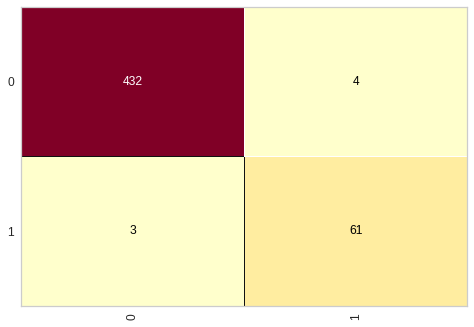

In [ ]:
#O eixo y refere-se aos dados verdadeiros
#O eixo x refere-se aos dados 
from yellowbrick.classifier import ConfusionMatrix
cn = ConfusionMatrix(knn_credit)
cn.fit(x_credit_treinamento, y_credit_treinamento)
cn.score(x_credit_teste,y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste,previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



Base de dados census

In [ ]:
#Abrindo a base de dados census, temos:
import pickle
with open('census.pkl','rb') as f:
  x_census_train, y_census_train, x_census_test, y_census_test = pickle.load(f)

In [ ]:
x_census_train.shape, y_census_train.shape

((27676, 108), (27676,))

In [ ]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [ ]:
#Agora que nossa base de dados está pronto, podemos aplicar o algoritmo
from sklearn.neighbors import KNeighborsClassifier
kn_census = KNeighborsClassifier(n_neighbors=5)
kn_census.fit(x_census_train,y_census_train)
previsoes = kn_census.predict(x_census_test)

In [ ]:
#Agora podemos comparar os dados verdadeiros com os dados previstos pelo algoritmo
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_test,previsoes)

0.8223132036847492

0.8223132036847492

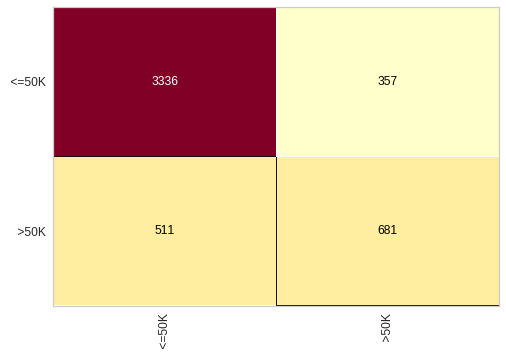

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cn = ConfusionMatrix(kn_census)
cn.fit(x_census_train,y_census_train)
cn.score(x_census_test,y_census_test)

In [ ]:
print(classification_report(y_census_test,previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      3693
        >50K       0.66      0.57      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.82      0.82      0.82      4885

